# run carbonation - input from class

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from helper_func import *
from carbonation import Carbonation_Model, load_df_R_ACC
from chloride import Chloride_Model, load_df_D_RCM, C_crit_param, C_eqv_to_C_S_0


/Users/gangli/OneDrive - University of Saskatchewan/Moose jaw grain elevator/field data with tinkrete model/Tinkrete_use_for_silo_project/carbonation.py:254: RuntimeWarning: divide by zero encountered in power
  W = (t_0 / t) ** ((p_SR * ToW) ** b_w / 2.0)
/Users/gangli/OneDrive - University of Saskatchewan/Moose jaw grain elevator/field data with tinkrete model/Tinkrete_use_for_silo_project/carbonation.py:63: RuntimeWarning: invalid value encountered in sqrt
  pars.k = (2 * pars.k_e * pars.k_c * (pars.k_t * pars.R_ACC_0_inv + pars.eps_t) * pars.C_S) ** 0.5 * pars.W_t


Pf(g = R-S < 0) from various methods
    sample count: 0.0003602377569195669
    g integral: 0.0003545438200179402
    R S integral: 0.0002885294701273585
    beta_factor: 3.4543063822705613


<IPython.core.display.Javascript object>


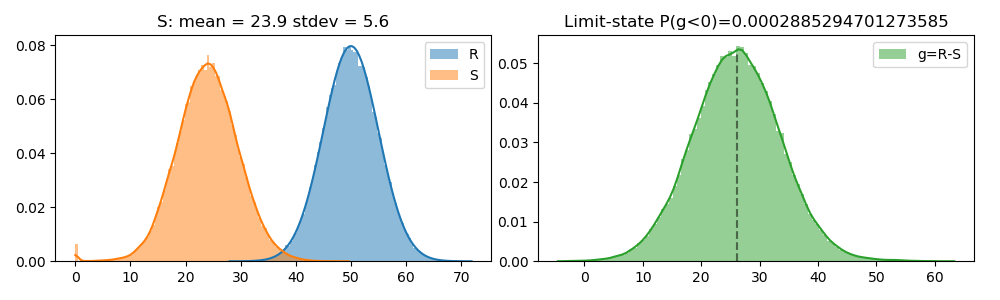

In [3]:
# Case study - carbonation

# global
class Wrapper: pass

pars = Wrapper()

pars.cover_mean = 50  # mm
pars.cover_std = 5
pars.RH_real = 60
pars.t_c = 28
pars.x_c = 0.008  # m
pars.ToW = 2 / 52.
pars.p_SR = 0.0
pars.C_S_emi = 0.

pars.option = Wrapper()
pars.option.choose = False
pars.option.cement_type = 'CEM_I_42.5_R+SF'
pars.option.wc_eqv = 0.6
pars.option.df_R_ACC = load_df_R_ACC()
pars.option.plot = True

# run model
M = Carbonation_Model(pars)
M.run(50)
M.postproc(plot=True)

In [4]:
# calibration to field data
carb_depth_field = Normal_custom(30, 5, n_sample=12)  # mm generate data 20 years

M_cal = M.calibrate(20, carb_depth_field, print_out=True)


/Users/gangli/OneDrive - University of Saskatchewan/Moose jaw grain elevator/field data with tinkrete model/Tinkrete_use_for_silo_project/carbonation.py:254: RuntimeWarning: divide by zero encountered in power
  W = (t_0 / t) ** ((p_SR * ToW) ** b_w / 2.0)
/Users/gangli/OneDrive - University of Saskatchewan/Moose jaw grain elevator/field data with tinkrete model/Tinkrete_use_for_silo_project/carbonation.py:63: RuntimeWarning: invalid value encountered in sqrt
  pars.k = (2 * pars.k_e * pars.k_c * (pars.k_t * pars.R_ACC_0_inv + pars.eps_t) * pars.C_S) ** 0.5 * pars.W_t


carb_depth:
model: 
mean:31.71943207642494
std:6.575713557933463
field: 
mean:31.751135485620498
std:4.197550179929503


In [ ]:
# carbonation with time
M_cal.carb_with_year(np.arange(2,100,5))

# Construction zone

In [ ]:
np.linsp

In [10]:
t_lis = np.arange(2,100,2)
M_lis = []
for t in t_lis:
    M_cal.run(t)
    M_cal.postproc()
    M_lis.append(M_cal.copy())

<IPython.core.display.Javascript object>


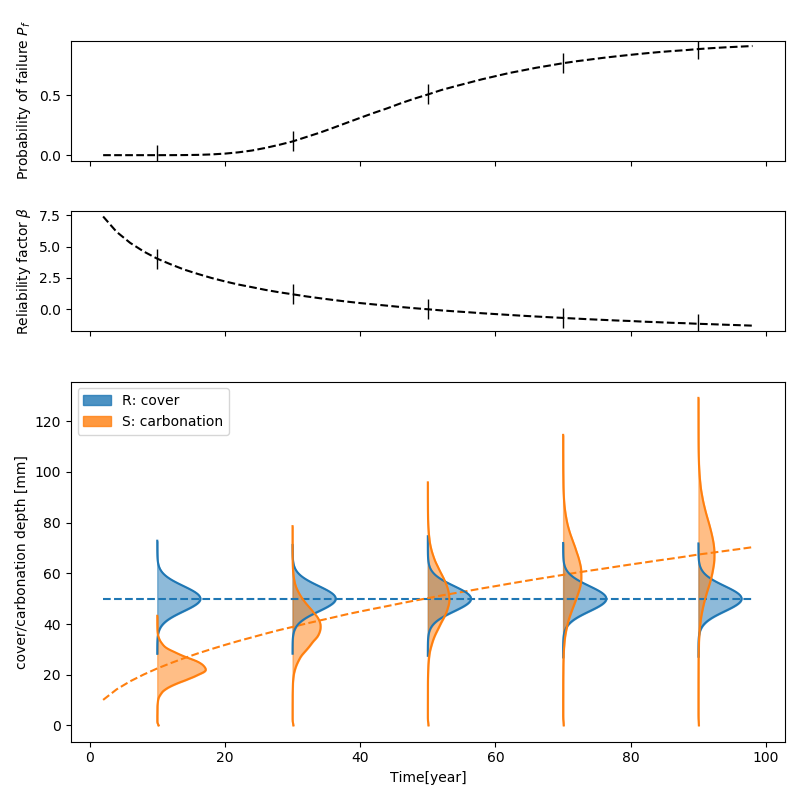

In [11]:
fig,[ax1,ax2,ax3] = plt.subplots(nrows = 3, figsize=(8,8),sharex=True,gridspec_kw={'height_ratios': [1,1,3]})
# plot a few distrubtion
t_plot = np.array([10,30,50,70,90]).astype('float')
indx =  [i for i, val in enumerate(t_lis) if val in set(t_plot)]
M_sel = [M_lis[i] for i in indx]


ax1.plot([this_M.t for this_M in M_lis], [this_M.pf for this_M in M_lis],'k--')
ax1.plot([this_M.t for this_M in M_sel], [this_M.pf for this_M in M_sel],'k|', markersize=15)
ax1.set_ylabel('Probability of failure $P_f$')

ax2.plot([this_M.t for this_M in M_lis], [this_M.beta_factor for this_M in M_lis], 'k--')
ax2.plot([this_M.t for this_M in M_sel], [this_M.beta_factor for this_M in M_sel], 'k|', markersize=15)
ax2.set_ylabel(r'Reliability factor $\beta$')

# plot mean results
ax3.plot(t_lis, [M.pars.cover_mean for M in M_lis], '--C0')
ax3.plot(t_lis, [Get_mean(M.xc_t) for M in M_lis], '--C1')
# plot distribution
for this_M in M_sel:
    RS_plot(this_M, ax=ax3, t_offset=this_M.t, amplify=80)

import matplotlib.patches as mpatches
R_patch = mpatches.Patch(color='C0', label='R: cover',alpha=0.8)
S_patch = mpatches.Patch(color='C1', label='S: carbonation',alpha=0.8)

ax3.set_xlabel('Time[year]')
ax3.set_ylabel('cover/carbonation depth [mm]')
ax3.legend(handles=[R_patch, S_patch],loc='upper left')

plt.tight_layout()



In [179]:
# fig.savefig('RS_time_carbonation.pdf',dpi=1200)


In [57]:
def carb_year(year_lis, model, plot=True, amplify=80):

    t_lis = year_lis
    M_cal = model

    M_lis = []
    for t in t_lis:
        M_cal.run(t)
        M_cal.postproc()
        M_lis.append(M_cal.copy())
    if plot:
        fig,[ax1,ax2,ax3] = plt.subplots(nrows = 3, figsize=(8,8),sharex=True,gridspec_kw={'height_ratios': [1,1,3]})
        # plot a few distrubtion
        indx = np.linspace(0,len(year_lis),min(7,len(year_lis))).astype('int')[1:-1]
        print(indx)
        M_sel = [M_lis[i] for i in indx]

        ax1.plot([this_M.t for this_M in M_lis], [this_M.pf for this_M in M_lis],'k--')
        ax1.plot([this_M.t for this_M in M_sel], [this_M.pf for this_M in M_sel],'k|', markersize=15)
        ax1.set_ylabel('Probability of failure $P_f$')

        ax2.plot([this_M.t for this_M in M_lis], [this_M.beta_factor for this_M in M_lis], 'k--')
        ax2.plot([this_M.t for this_M in M_sel], [this_M.beta_factor for this_M in M_sel], 'k|', markersize=15)
        ax2.set_ylabel(r'Reliability factor $\beta$')

        # plot mean results
        ax3.plot(t_lis, [M.pars.cover_mean for M in M_lis], '--C0')
        ax3.plot(t_lis, [Get_mean(M.xc_t) for M in M_lis], '--C1')
        # plot distribution
        for this_M in M_sel:
            RS_plot(this_M, ax=ax3, t_offset=this_M.t, amplify=amplify)

        import matplotlib.patches as mpatches
        R_patch = mpatches.Patch(color='C0', label='R: cover',alpha=0.8)
        S_patch = mpatches.Patch(color='C1', label='S: carbonation',alpha=0.8)

        ax3.set_xlabel('Time[year]')
        ax3.set_ylabel('cover/carbonation depth [mm]')
        ax3.legend(handles=[R_patch, S_patch],loc='upper left')

        plt.tight_layout()

    return [this_M.pf for this_M in M_lis], [this_M.beta_factor for this_M in M_lis]




/Users/gangli/OneDrive - University of Saskatchewan/Moose jaw grain elevator/field data with tinkrete model/Tinkrete_use_for_silo_project/carbonation.py:254: RuntimeWarning: divide by zero encountered in power
  W = (t_0 / t) ** ((p_SR * ToW) ** b_w / 2.0)
/Users/gangli/OneDrive - University of Saskatchewan/Moose jaw grain elevator/field data with tinkrete model/Tinkrete_use_for_silo_project/carbonation.py:63: RuntimeWarning: invalid value encountered in sqrt
  pars.k = (2 * pars.k_e * pars.k_c * (pars.k_t * pars.R_ACC_0_inv + pars.eps_t) * pars.C_S) ** 0.5 * pars.W_t


<IPython.core.display.Javascript object>


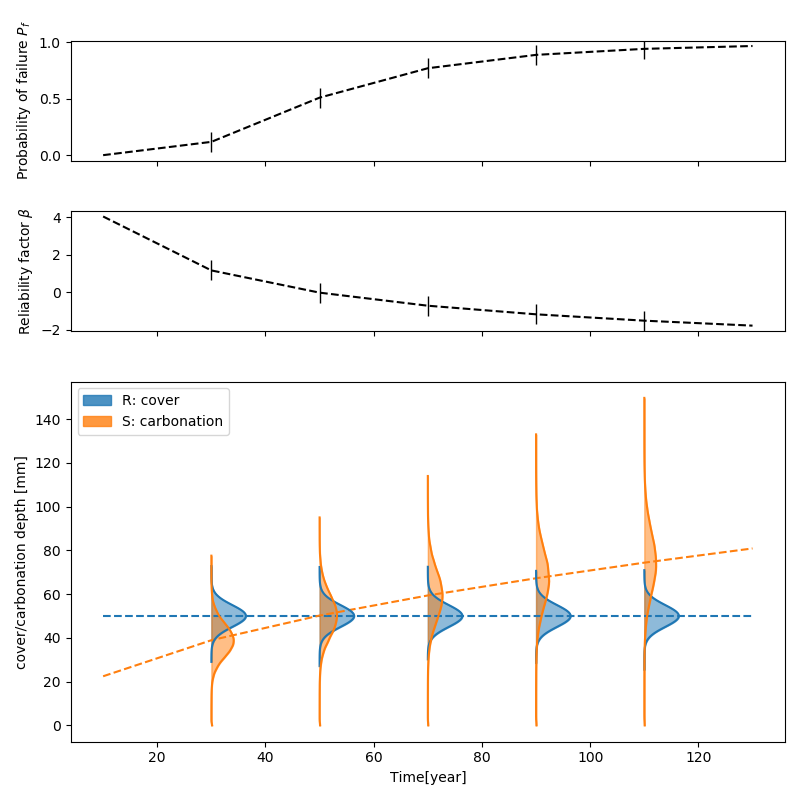

[1 2 3 4 5]


In [58]:
year_lis = np.arange(10,150,20)

pf_lis, beta_lis = carb_year(year_lis, M_cal)

[0.0002885294701273585,
 0.0002885294701273585,
 0.0002885294701273585,
 0.0002885294701273585,
 0.0002885294701273585]

In [52]:
indx = np.linspace(0,len(year_lis),min(5,len(year_lis))).astype('int')[1:-1]
print(indx)


M_sel = [M_lis[i] for i in indx]



[1 2 3]
